# Importing Libraries

In [70]:
import warnings
warnings.filterwarnings("ignore")
from getMatchData import get_match_data
import numpy as np
import pandas as pd
import getPlayersData as gpd
from pprint import pprint
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score, f1_score

# Loading the data

In [2]:
# match_data = get_match_data()
match_data = pd.read_csv("csv_files/Match Data 20220915.csv")

In [3]:
pd.set_option("display.max_columns", None)

In [4]:
match_data.tail()

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,participantid,side,position,playername,playerid,teamname,teamid,champion,ban1,ban2,ban3,ban4,ban5,gamelength,result,kills,deaths,assists,teamkills,teamdeaths,doublekills,triplekills,quadrakills,pentakills,firstblood,firstbloodkill,firstbloodassist,firstbloodvictim,team kpm,ckpm,firstdragon,dragons,opp_dragons,elementaldrakes,opp_elementaldrakes,infernals,mountains,clouds,oceans,chemtechs,hextechs,dragons (type unknown),elders,opp_elders,firstherald,heralds,opp_heralds,firstbaron,barons,opp_barons,firsttower,towers,opp_towers,firstmidtower,firsttothreetowers,turretplates,opp_turretplates,inhibitors,opp_inhibitors,damagetochampions,dpm,damageshare,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,earnedgoldshare,goldspent,gspd,total cs,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,xpat10,csat10,opp_goldat10,opp_xpat10,opp_csat10,golddiffat10,xpdiffat10,csdiffat10,killsat10,assistsat10,deathsat10,opp_killsat10,opp_assistsat10,opp_deathsat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
133543,ESPORTSTMNT06_2580442,complete,NaN,ESLOL,2023,Summer,0,2022-09-14 20:25:14,5,12.16,8,Red,mid,Vik,oe:player:b6ad4db5205a977d3ed19cd2407a5fc,ZennIT,oe:team:79fc65ce199f2e4fe97e277bdef6695,Sylas,Seraphine,Pyke,Soraka,Nautilus,Yuumi,2252,0,6,4,8,19,19,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.5062,1.0124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,20728.0,552.2558,0.203299,756.2877,682.1137,12.0,0.3197,6.0,0.1599,2.0,34.0,0.9059,15305,10435.0,278.0195,0.239005,15250.0,NaN,275.0,223.0,52.0,NaN,NaN,7.3268,4346.0,4415.0,65.0,3425.0,3612.0,58.0,921.0,803.0,7.0,2.0,6.0,1.0,1.0,1.0,4.0,6672.0,7229.0,116.0,5328.0,5790.0,112.0,1344.0,1439.0,4.0,3.0,6.0,1.0,1.0,1.0,4.0
133544,ESPORTSTMNT06_2580442,complete,NaN,ESLOL,2023,Summer,0,2022-09-14 20:25:14,5,12.16,9,Red,bot,Myckio,oe:player:0decdc8d7da391c6f0822bc58149638,ZennIT,oe:team:79fc65ce199f2e4fe97e277bdef6695,Zeri,Seraphine,Pyke,Soraka,Nautilus,Yuumi,2252,0,4,1,3,19,19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5062,1.0124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,30351.0,808.6412,0.297681,453.5968,293.3659,16.0,0.4263,10.0,0.2664,7.0,45.0,1.1989,16254,11384.0,303.3037,0.260740,15875.0,NaN,338.0,312.0,26.0,NaN,NaN,9.0053,3336.0,3626.0,90.0,3021.0,3769.0,77.0,315.0,-143.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,5807.0,5708.0,139.0,5015.0,6212.0,127.0,792.0,-504.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0
133545,ESPORTSTMNT06_2580442,complete,NaN,ESLOL,2023,Summer,0,2022-09-14 20:25:14,5,12.16,10,Red,sup,Moosey,oe:player:3ec9b028e70acf4aaaf81d8034dc5b0,ZennIT,oe:team:79fc65ce199f2e4fe97e277bdef6695,Tahm Kench,Seraphine,Pyke,Soraka,Nautilus,Yuumi,2252,0,3,4,9,19,19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5062,1.0124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,8526.0,227.1581,0.083623,563.8721,593.4458,54.0,1.4387,8.0,0.2131,11.0,94.0,2.5044,8908,4038.0,107.5844,0.092491,8625.0,NaN,38.0,38.0,0.0,NaN,NaN,1.0124,3040.0,2769.0,16.0,2019.0,1862.0,11.0,1021.0,907.0,5.0,2.0,4.0,0.0,0.0,1.0,2.0,4163.0,4084.0,26.0,2968.0,3223.0,19.0,1195.0,861.0,7.0,2.0,5.0,0.0,0.0,1.0,3.0
133546,ESPORTSTMNT06_2580442,complete,NaN,ESLOL,2023,Summer,0,2022-09-14 20:25:14,5,12.16,100,Blue,team,NaN,NaN,KV Mechelen Esports,oe:team:fc7375b80317eeffe3f05e4d3912626,NaN,Gnar,Jarvan IV,Caitlyn,Viktor,Lulu,2252,1,19,19,47,19,19,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.5062,1.0124,1.0,3.0,3.0,3.0,3.0,0.0,1.0,2.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,2.0,1.0,3.0,0.0,1.0,9.0,8.0,0.0,1.0,4.0,3.0,1.0,2.0,96346.0,2566.9449,NaN,3660.6128,3979.1563,112.0,2.9840,40.0,

In [5]:
match_data.playername.value_counts()

unknown player    980
Ming              137
GALA              137
Xiaohu            137
Wei               137
                 ... 
VV                  1
Ankor               1
Huskyy              1
Crush3              1
Kofla               1
Name: playername, Length: 3435, dtype: int64

In [6]:
match_data[match_data["playername"] == "Adept"].result.value_counts()

0    30
1    10
Name: result, dtype: int64

In [7]:
def calculate_win_percentage(player_data):
    total_games = len(player_data)
    total_wins = len(player_data[player_data.result == 1])
    return (total_wins / total_games) * 100

In [8]:
calculate_win_percentage(match_data[match_data["playername"] == "Adept"])

25.0

In [9]:
match_data[["gameid", "teamid", "playerid", "position"]].values

array([['ESPORTSTMNT01_2690210',
        'oe:team:68911b3329146587617ab2973106e23',
        'oe:player:38e0af7278d6769d0c81d7c4b47ac1e', 'top'],
       ['ESPORTSTMNT01_2690210',
        'oe:team:68911b3329146587617ab2973106e23',
        'oe:player:637ed20b1e41be1c51bd1a4cb211357', 'jng'],
       ['ESPORTSTMNT01_2690210',
        'oe:team:68911b3329146587617ab2973106e23',
        'oe:player:d1ae0e2f9f3ac1e0e0cdcb86504ca77', 'mid'],
       ...,
       ['ESPORTSTMNT06_2580442',
        'oe:team:79fc65ce199f2e4fe97e277bdef6695',
        'oe:player:3ec9b028e70acf4aaaf81d8034dc5b0', 'sup'],
       ['ESPORTSTMNT06_2580442',
        'oe:team:fc7375b80317eeffe3f05e4d3912626', nan, 'team'],
       ['ESPORTSTMNT06_2580442',
        'oe:team:79fc65ce199f2e4fe97e277bdef6695', nan, 'team']],
      dtype=object)

In [10]:
def invalid_games_checker(invalid_str="NA"):
    
    # Check if "NA" is present
    flag = False
    for element in match_data[["gameid", "teamid", "playerid", "position"]].values:
        for item in element:
            if not isinstance(item, float):
                if invalid_str in item:
                    flag = True
                    if invalid_str:
                        pprint(f"Has {invalid_str}")
                    else:
                        pprint("Has empty string")
                    break
        if flag:
            break

In [11]:
# check NA
invalid_games_checker(invalid_str="NA")

# check empty string
invalid_games_checker(invalid_str="")

# check nan
invalid_games_checker(invalid_str="nan")

# check null
invalid_games_checker(invalid_str="null")



'Has NA'
'Has empty string'


In [12]:
match_data.shape

(133548, 123)

# Cleaning and formatting data

In [13]:
invalid_game_ids = []

# removing the invalid game data for invalid game ids
for gid in match_data.gameid.values:
    if not isinstance(gid, float):
        if "NA" in gid:
            invalid_game_ids.append(gid)

match_data = match_data[~match_data["gameid"].isin(invalid_game_ids)].copy()

In [14]:
match_data.shape

(126984, 123)

In [15]:
# First removing the data that has empty, nan or null string
format_dict = {
    "": np.nan, 
    "nan": np.nan, 
    "null":np.nan
}

# convert all to str
match_data["gameid"] = match_data["gameid"].str.strip()
match_data["teamid"] = match_data["teamid"].str.strip()
match_data["playerid"] = match_data["playerid"].str.strip()

# replace the invalid values to np.nan
# https://sparkbyexamples.com/pandas/pandas-remap-values-in-column-with-a-dictionary-dict/#:~:text=Using%20Pandas%20DataFrame.-,replace(),regular%20expressions%20for%20regex%20substitutions.
match_data = match_data.replace({
    "gameid": format_dict,
    "teamid": format_dict,
    "playerid": format_dict,
    "position": format_dict
})

In [16]:
match_data.shape

(126984, 123)

In [17]:
# Drop nan value
match_data = match_data[match_data.gameid.notna()]
match_data = match_data[match_data.position.notna()]

In [18]:
match_data.shape

(126984, 123)

In [19]:
# Drop duplicates if any
match_data = match_data.drop_duplicates()

In [20]:
match_data.shape

(126984, 123)

- There are no duplicates

# Separating players data from match data

In [21]:
# look into the dataframe for features
player_data = match_data[match_data["position"] != "team"]
player_data.head()

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,participantid,side,position,playername,playerid,teamname,teamid,champion,ban1,ban2,ban3,ban4,ban5,gamelength,result,kills,deaths,assists,teamkills,teamdeaths,doublekills,triplekills,quadrakills,pentakills,firstblood,firstbloodkill,firstbloodassist,firstbloodvictim,team kpm,ckpm,firstdragon,dragons,opp_dragons,elementaldrakes,opp_elementaldrakes,infernals,mountains,clouds,oceans,chemtechs,hextechs,dragons (type unknown),elders,opp_elders,firstherald,heralds,opp_heralds,firstbaron,barons,opp_barons,firsttower,towers,opp_towers,firstmidtower,firsttothreetowers,turretplates,opp_turretplates,inhibitors,opp_inhibitors,damagetochampions,dpm,damageshare,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,earnedgoldshare,goldspent,gspd,total cs,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,xpat10,csat10,opp_goldat10,opp_xpat10,opp_csat10,golddiffat10,xpdiffat10,csdiffat10,killsat10,assistsat10,deathsat10,opp_killsat10,opp_assistsat10,opp_deathsat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,1,Blue,top,Soboro,oe:player:38e0af7278d6769d0c81d7c4b47ac1e,Fredit BRION Challengers,oe:team:68911b3329146587617ab2973106e23,Renekton,Karma,Caitlyn,Syndra,Thresh,Lulu,1713,0,2,3,2,9,19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3152,0.9807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,15768.0,552.2942,0.278784,1072.3993,777.7933,8.0,0.2802,6.0,0.2102,5.0,26.0,0.9107,10934,7164.0,250.9282,0.253859,10275.0,NaN,231.0,220.0,11.0,NaN,NaN,8.0911,3228.0,4909.0,89.0,3176.0,4953.0,81.0,52.0,-44.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,5025.0,7560.0,135.0,4634.0,7215.0,121.0,391.0,345.0,14.0,0.0,1.0,0.0,0.0,1.0,0.0
1,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,2,Blue,jng,Raptor,oe:player:637ed20b1e41be1c51bd1a4cb211357,Fredit BRION Challengers,oe:team:68911b3329146587617ab2973106e23,Xin Zhao,Karma,Caitlyn,Syndra,Thresh,Lulu,1713,0,2,5,6,9,19,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.3152,0.9807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,11765.0,412.0841,0.208009,944.2732,650.1576,6.0,0.2102,18.0,0.6305,6.0,48.0,1.6813,9138,5368.0,188.0210,0.190220,8750.0,NaN,148.0,33.0,115.0,NaN,NaN,5.1839,3429.0,3484.0,58.0,2944.0,3052.0,63.0,485.0,432.0,-5.0,1.0,2.0,0.0,0.0,0.0,1.0,5366.0,5320.0,89.0,4825.0,5595.0,100.0,541.0,-275.0,-11.0,2.0,3.0,2.0,0.0,5.0,1.0
2,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,3,Blue,mid,Feisty,oe:player:d1ae0e2f9f3ac1e0e0cdcb86504ca77,Fredit BRION Challengers,oe:team:68911b3329146587617ab2973106e23,LeBlanc,Karma,Caitlyn,Syndra,Thresh,Lulu,1713,0,2,2,3,9,19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3152,0.9807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,14258.0,499.4046,0.252086,581.6462,227.7758,19.0,0.6655,7.0,0.2452,7.0,29.0,1.0158,9715,5945.0,208.2312,0.210665,8725.0,NaN,193.0,177.0,16.0,NaN,NaN,6.7601,3283.0,4556.0,81.0,3121.0,4485.0,81.0,162.0,71.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,5118.0,6942.0,120.0,5593.0,6789.0,119.0,-475.0,153.0,1.0,0.0,3.0,0.0,3.0,3.0,2.0
3,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,4,Blue,bot,Gamin,oe:player:998b3e49b01ecc41eacc392477a98cf,Fredit BRION Challengers,oe:team:68911b3329146587617ab2973106e23,Samira,Karma,Caitlyn,Syndra,Thresh,Lulu,1713,0,2,4,2,9,19,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.3152,0.9807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.

In [22]:
player_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105820 entries, 0 to 133545
Columns: 123 entries, gameid to opp_deathsat15
dtypes: float64(93), int64(12), object(18)
memory usage: 100.1+ MB


In [23]:
player_data.date.values
pprint(type(player_data.date.values[0]))

<class 'str'>


In [24]:
# Format date according to datetime
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html
# https://www.geeksforgeeks.org/convert-the-column-type-from-string-to-datetime-format-in-pandas-dataframe/
player_data = player_data.astype({"date": "datetime64"})

In [25]:
pprint(type(player_data.date.values[0]))

<class 'numpy.datetime64'>


# Downloading the full players data

In [26]:
gpd.players_data_to_csv(player_data)

# Player Data Cleaning

# Get all the features of players data

In [27]:
player_data.columns

Index(['gameid', 'datacompleteness', 'url', 'league', 'year', 'split',
       'playoffs', 'date', 'game', 'patch',
       ...
       'opp_csat15', 'golddiffat15', 'xpdiffat15', 'csdiffat15', 'killsat15',
       'assistsat15', 'deathsat15', 'opp_killsat15', 'opp_assistsat15',
       'opp_deathsat15'],
      dtype='object', length=123)

- There are total 123 features but to figure out which features to remove and which features to keep is still in blur
- First look at the CSV file and see if we can remove any feature

In [28]:
player_data_copy = player_data.copy()

## Remove rows where datacompleteness is partial

In [29]:
player_data_copy.datacompleteness.value_counts()

complete    88400
partial     17420
Name: datacompleteness, dtype: int64

- There are 15060 entries that has partial data
- So we take only the complete data

In [30]:
player_data_copy = player_data_copy[player_data_copy.datacompleteness == "complete"]

In [31]:
pprint(player_data.shape)
pprint(player_data_copy.shape)

(105820, 123)
(88400, 123)


## Drop Multiple columns

In [32]:
# dropped column names
dropped_features = [
    "datacompleteness", "url", "firstdragon", "dragons", "opp_dragons", "elementaldrakes",
    "opp_elementaldrakes", "infernals", "mountains", "clouds", "oceans", "chemtechs", "hextechs",
    "dragons (type unknown)", "elders", "opp_elders", "firstherald", "heralds",
    "opp_heralds", "firstbaron", "firsttower", "towers", "opp_towers", "firstmidtower",
    "firsttothreetowers", "turretplates", "opp_turretplates"
]
len(dropped_features)

27

In [33]:
player_data_copy = player_data_copy.drop(dropped_features, axis=1)

In [34]:
player_data_copy.shape

(88400, 96)

- There are 96 features remaining out of which some are important for keeping the data in neo4j database like player name and other such things

In [35]:
player_data_copy.head()

,gameid,league,year,split,playoffs,date,game,patch,participantid,side,position,playername,playerid,teamname,teamid,champion,ban1,ban2,ban3,ban4,ban5,gamelength,result,kills,deaths,assists,teamkills,teamdeaths,doublekills,triplekills,quadrakills,pentakills,firstblood,firstbloodkill,firstbloodassist,firstbloodvictim,team kpm,ckpm,barons,opp_barons,inhibitors,opp_inhibitors,damagetochampions,dpm,damageshare,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,earnedgoldshare,goldspent,gspd,total cs,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,xpat10,csat10,opp_goldat10,opp_xpat10,opp_csat10,golddiffat10,xpdiffat10,csdiffat10,killsat10,assistsat10,deathsat10,opp_killsat10,opp_assistsat10,opp_deathsat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,ESPORTSTMNT01_2690210,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,1,Blue,top,Soboro,oe:player:38e0af7278d6769d0c81d7c4b47ac1e,Fredit BRION Challengers,oe:team:68911b3329146587617ab2973106e23,Renekton,Karma,Caitlyn,Syndra,Thresh,Lulu,1713,0,2,3,2,9,19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3152,0.9807,0.0,0.0,0.0,0.0,15768.0,552.2942,0.278784,1072.3993,777.7933,8.0,0.2802,6.0,0.2102,5.0,26.0,0.9107,10934,7164.0,250.9282,0.253859,10275.0,NaN,231.0,220.0,11.0,NaN,NaN,8.0911,3228.0,4909.0,89.0,3176.0,4953.0,81.0,52.0,-44.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,5025.0,7560.0,135.0,4634.0,7215.0,121.0,391.0,345.0,14.0,0.0,1.0,0.0,0.0,1.0,0.0
1,ESPORTSTMNT01_2690210,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,2,Blue,jng,Raptor,oe:player:637ed20b1e41be1c51bd1a4cb211357,Fredit BRION Challengers,oe:team:68911b3329146587617ab2973106e23,Xin Zhao,Karma,Caitlyn,Syndra,Thresh,Lulu,1713,0,2,5,6,9,19,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.3152,0.9807,0.0,0.0,0.0,1.0,11765.0,412.0841,0.208009,944.2732,650.1576,6.0,0.2102,18.0,0.6305,6.0,48.0,1.6813,9138,5368.0,188.0210,0.190220,8750.0,NaN,148.0,33.0,115.0,NaN,NaN,5.1839,3429.0,3484.0,58.0,2944.0,3052.0,63.0,485.0,432.0,-5.0,1.0,2.0,0.0,0.0,0.0,1.0,5366.0,5320.0,89.0,4825.0,5595.0,100.0,541.0,-275.0,-11.0,2.0,3.0,2.0,0.0,5.0,1.0
2,ESPORTSTMNT01_2690210,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,3,Blue,mid,Feisty,oe:player:d1ae0e2f9f3ac1e0e0cdcb86504ca77,Fredit BRION Challengers,oe:team:68911b3329146587617ab2973106e23,LeBlanc,Karma,Caitlyn,Syndra,Thresh,Lulu,1713,0,2,2,3,9,19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3152,0.9807,0.0,0.0,0.0,0.0,14258.0,499.4046,0.252086,581.6462,227.7758,19.0,0.6655,7.0,0.2452,7.0,29.0,1.0158,9715,5945.0,208.2312,0.210665,8725.0,NaN,193.0,177.0,16.0,NaN,NaN,6.7601,3283.0,4556.0,81.0,3121.0,4485.0,81.0,162.0,71.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,5118.0,6942.0,120.0,5593.0,6789.0,119.0,-475.0,153.0,1.0,0.0,3.0,0.0,3.0,3.0,2.0
3,ESPORTSTMNT01_2690210,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,4,Blue,bot,Gamin,oe:player:998b3e49b01ecc41eacc392477a98cf,Fredit BRION Challengers,oe:team:68911b3329146587617ab2973106e23,Samira,Karma,Caitlyn,Syndra,Thresh,Lulu,1713,0,2,4,2,9,19,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.3152,0.9807,0.0,0.0,0.0,0.0,11106.0,389.0018,0.196358,463.8529,218.8792,12.0,0.4203,6.0,0.2102,4.0,25.0,0.8757,10605,6835.0,239.4046,0.242201,10425.0,NaN,226.0,208.0,18.0,NaN,NaN,7.9159,3600.0,3103.0,78.0,3304.0,2838.0,90.0,296.0,265.0,-12.0,1.0,1.0,0.0,0.0,0.0,0.0,5461.0,4591.0,115.0,6254.0,5934.0,149.0,-793.0,-1343.0,-34.0,2.0,1.0,2.0,3.0,3.0,0.0
4,ESPORTSTMNT01_2690210,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,5,Blue,sup,Loopy,oe:player:e9741b3a238723ea6380ef2113fae63,Fredit BRION Challengers,oe:team:68911b3329146587617ab2973106e23,Leona,Karma,Caitlyn,Syndra,Thresh,Lulu,1713,0,1,5,6,9,19,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.3152,0.9807,0.0,0.0,0.0,0.0,3663.0,128.3012,0.064763,475.0263,490.1226,29.0,1.0158,14.0,0.4904,11.0,69.0,2.4168,6678,2908.0,101.8564,0.103054,6395.0,NaN,

# Correlation matrix

In [36]:
# Correlation matrix
# plt.matshow(player_data_copy.corr())
# continuous_features = player_data_copy.describe().columns
# plt.xticks(range(len(continuous_features)), continuous_features, rotation="45")
# plt.yticks(range(len(continuous_features)), continuous_features, rotation="45")
# plt.colorbar()
# plt.show()


- As you can see plotting directly the correlation cannot solve anything, What we can do is plot the correlation plot without the column names

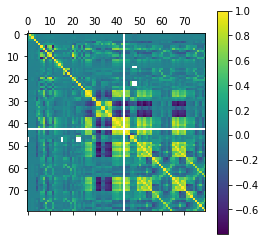

In [37]:
# Correlation matrix
plt.matshow(player_data_copy.corr())
# continuous_features = player_data_copy.describe().columns
# plt.xticks(range(len(continuous_features)), continuous_features, rotation="45")
# plt.yticks(range(len(continuous_features)), continuous_features, rotation="45")
plt.colorbar()
plt.show()

- From this we can infer that where the value is near 1 that has the most correlation

## Lets first look at each column and different values for each column with a histogram

In [38]:
# histogram
# for name in player_data_copy.describe().columns:
#     player_data_copy[name].hist()
#     plt.title(f"Plot for {name}")
#     plt.show()

In [39]:
# drop gspd
player_data_copy = player_data_copy.drop(["gspd"], axis=1)

In [40]:
data_len = len(player_data_copy.describe().columns)
print(data_len)

79


### Learn subplots
https://stackoverflow.com/questions/61443444/two-column-subplot-using-matplotlib-and-seaborn

In [41]:
# ncols = 2
# nrows = data_len // ncols

continuous_features = player_data_copy.describe().columns
# fig, ax = plt.subplots(nrows, ncols)
# ax=ax.ravel()
# for idx, a in enumerate(ax):
#     fig.set_figheight(15)
#     fig.set_figwidth(15)
#     a.hist(player_data_copy[continuous_features[idx]])
#     a.set_title(continuous_features[idx])
# plt.tight_layout()


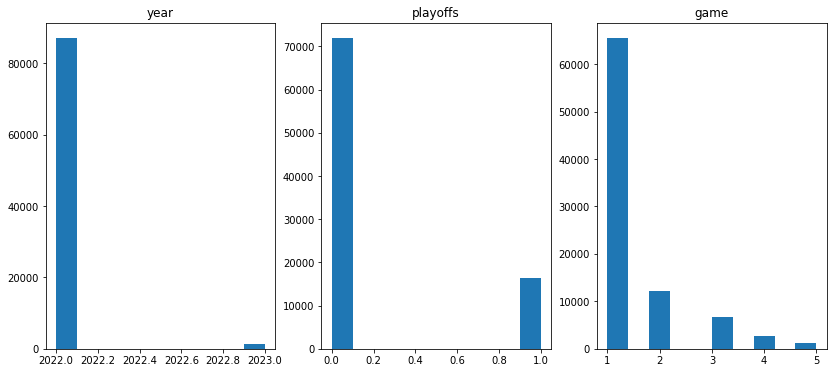

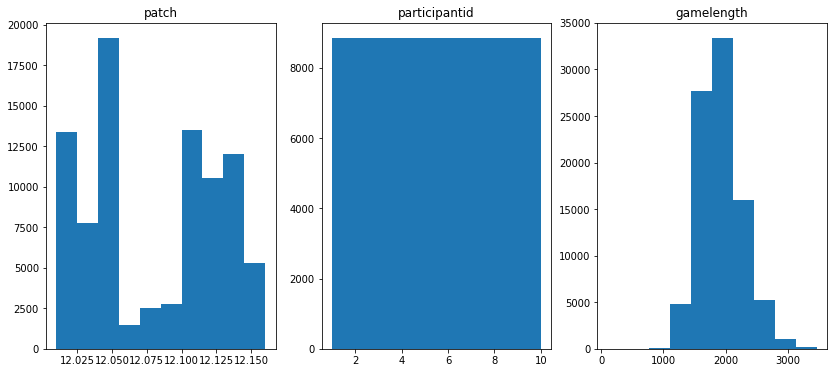

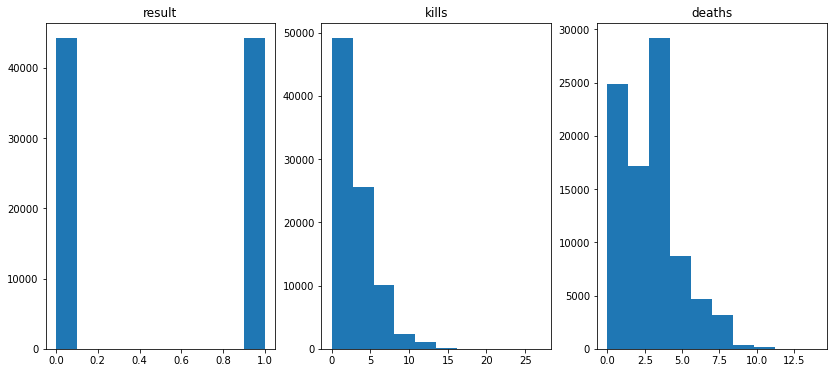

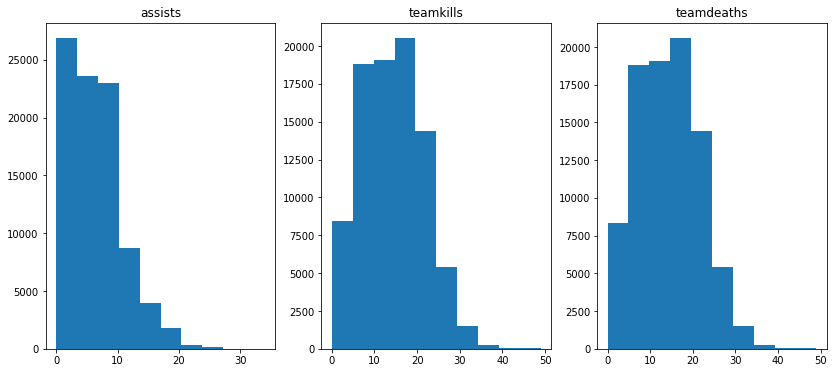

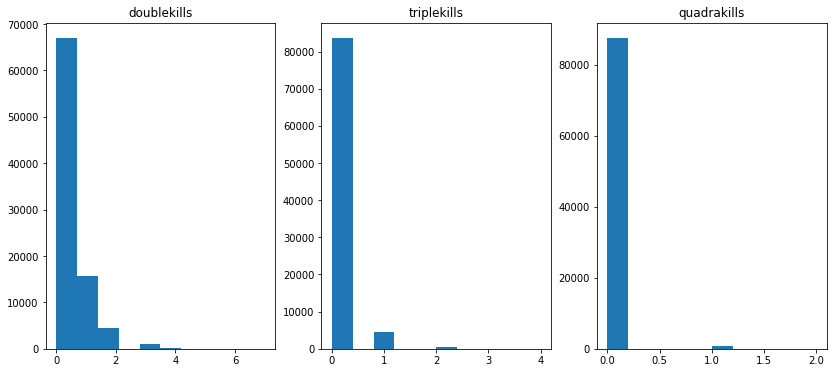

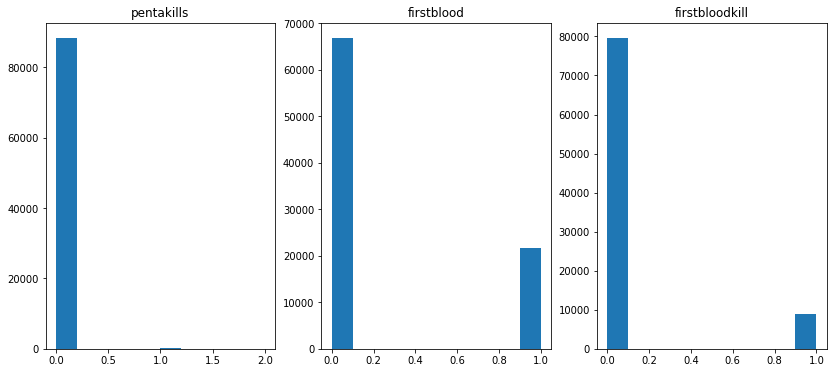

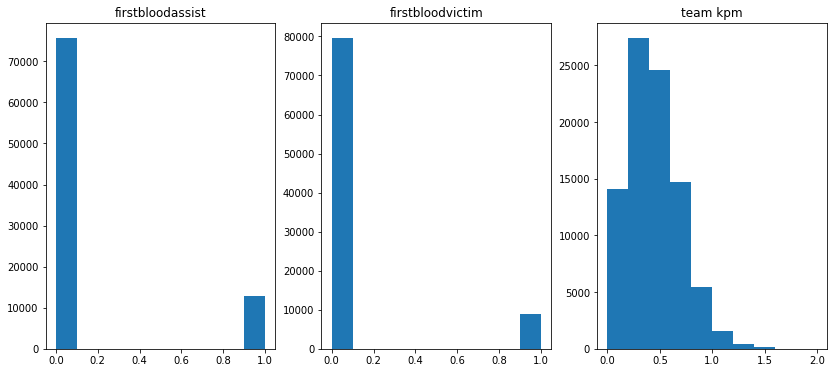

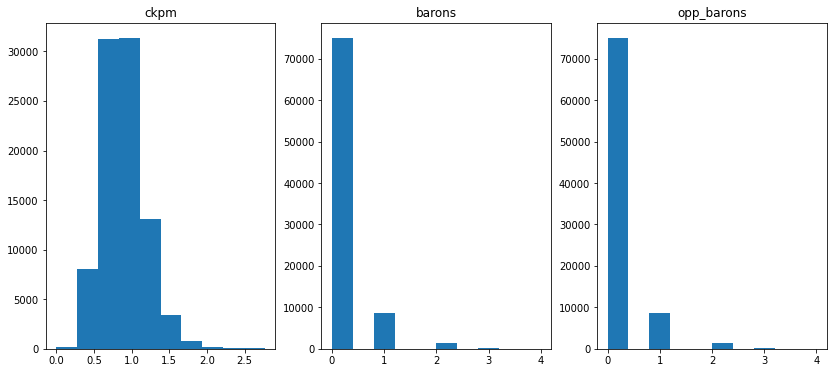

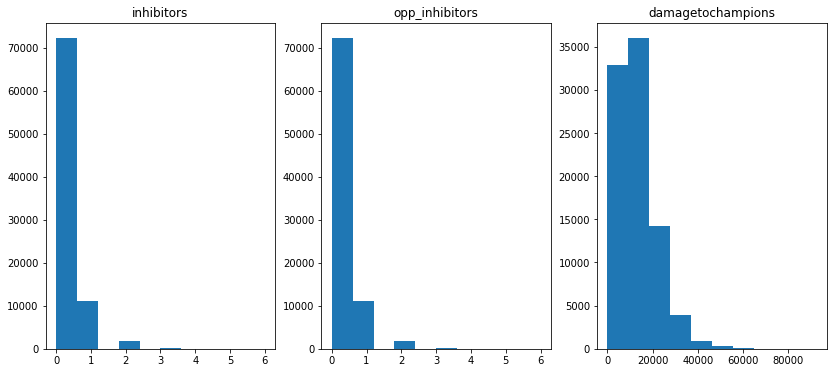

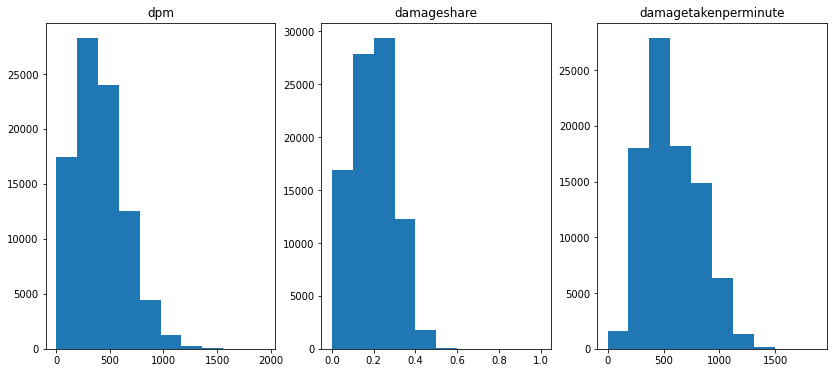

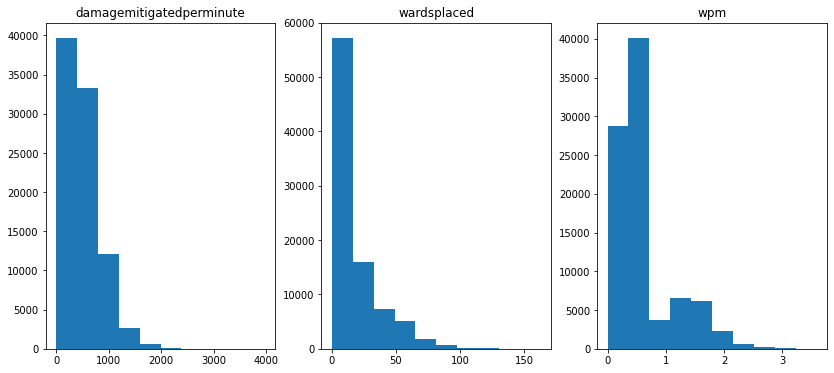

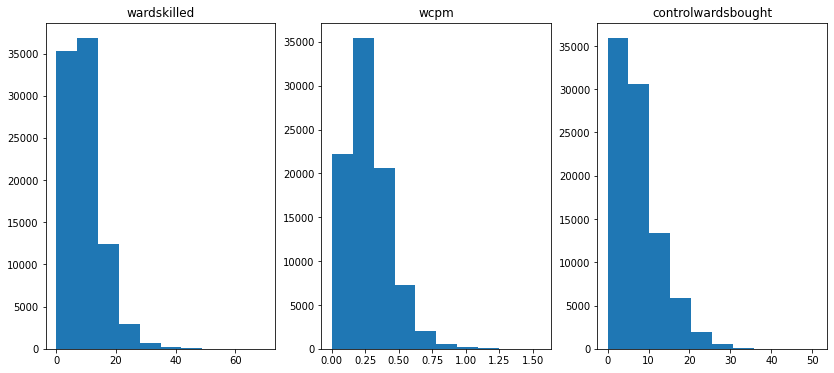

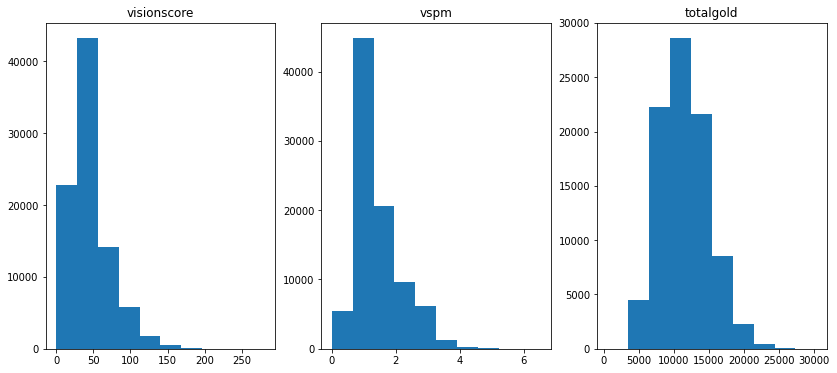

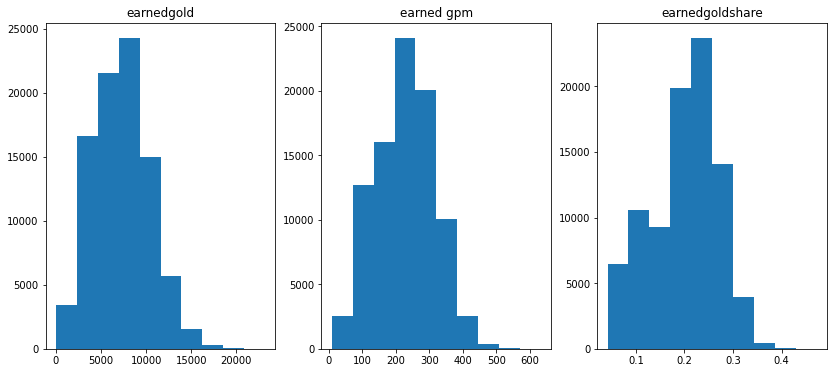

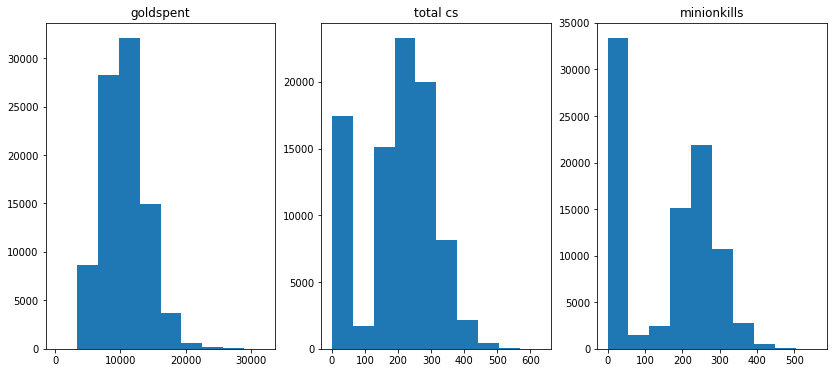

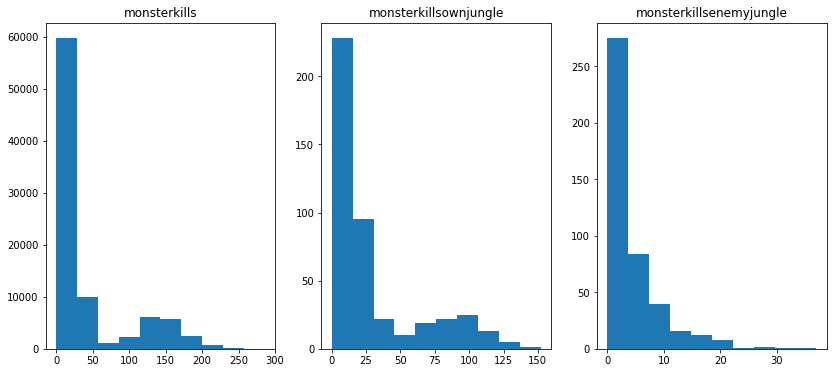

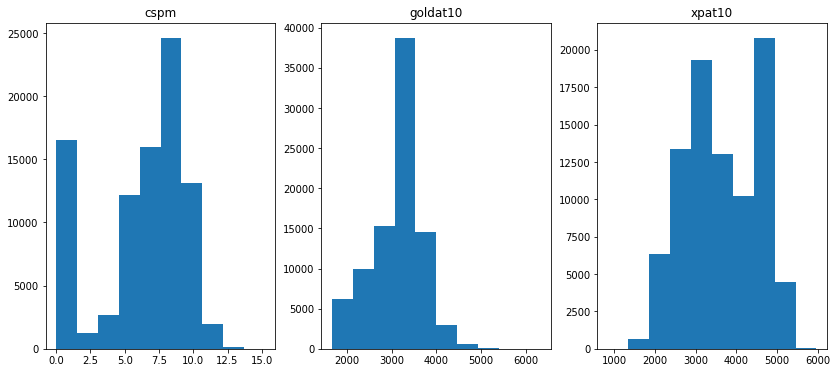

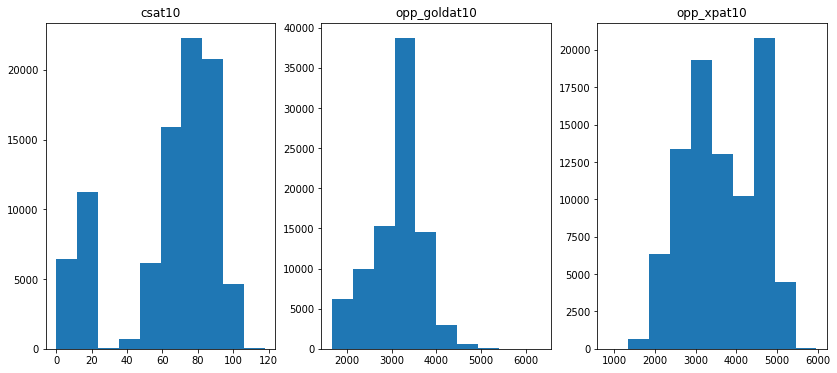

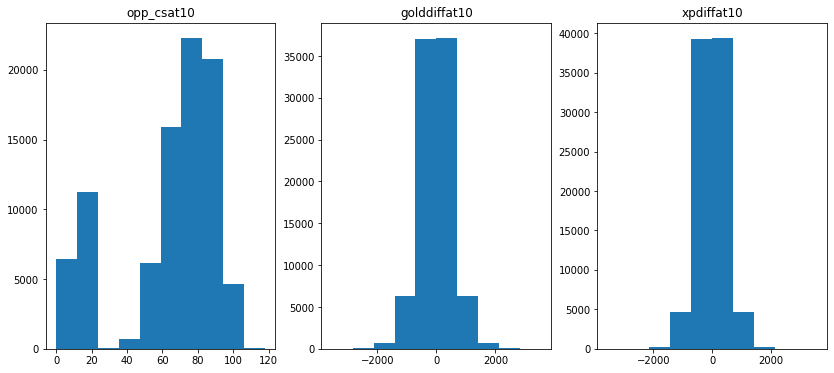

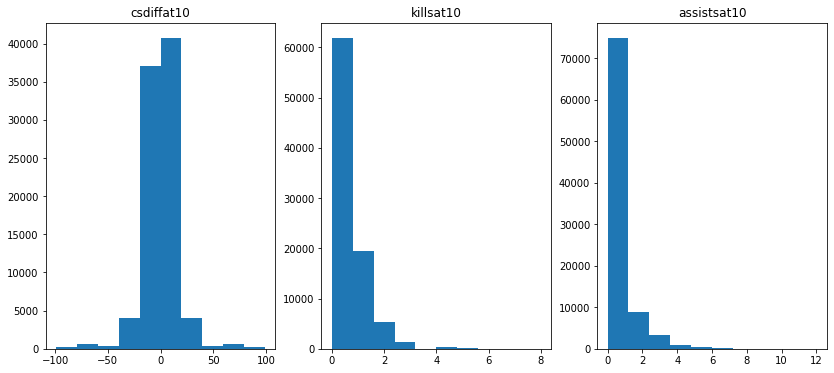

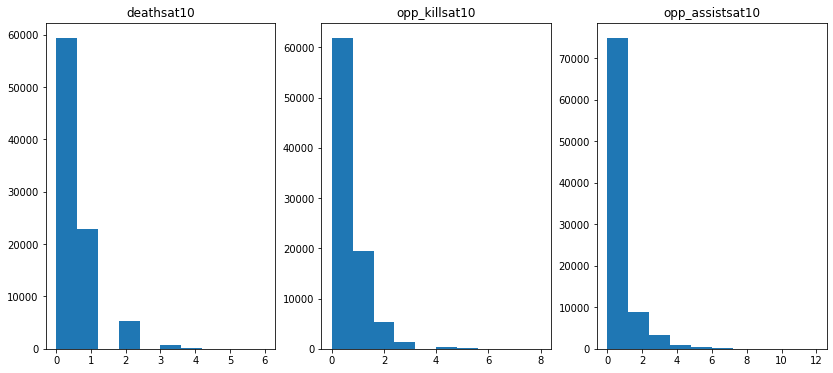

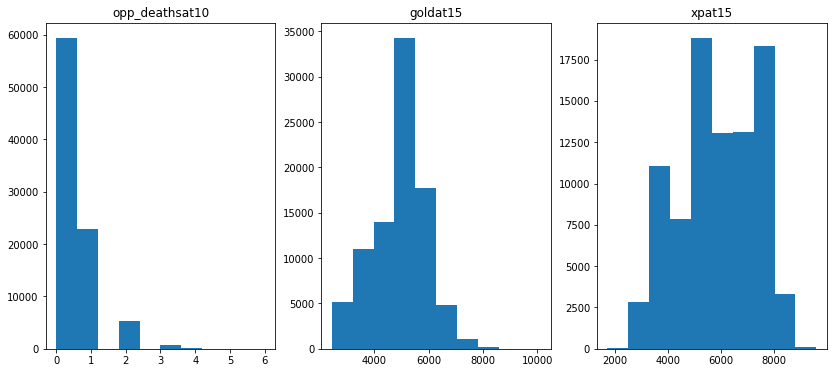

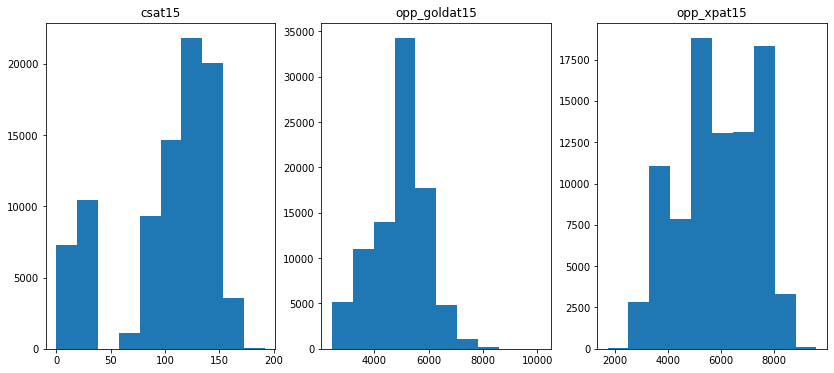

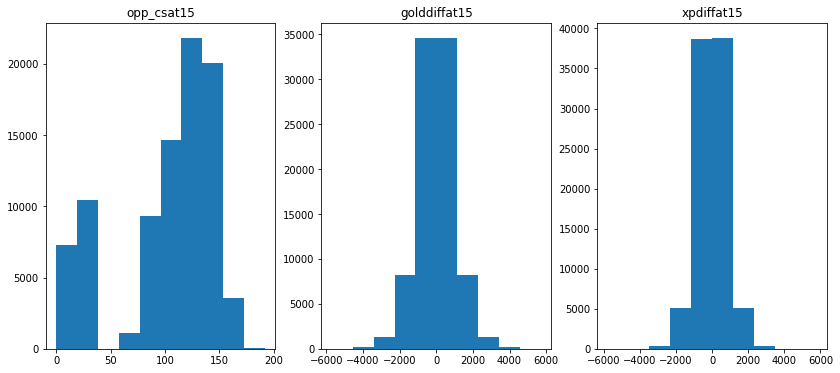

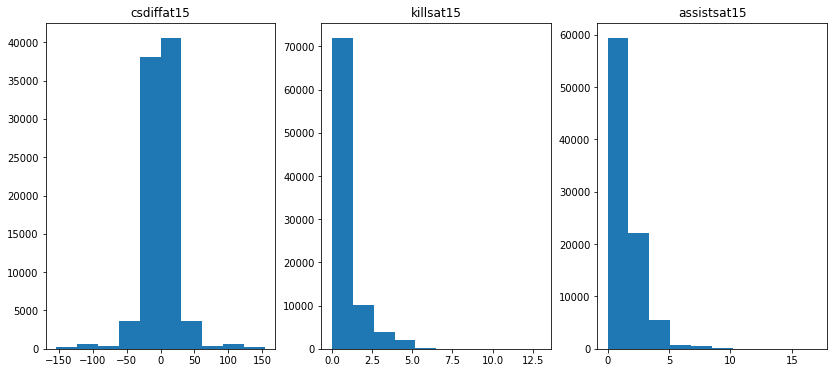

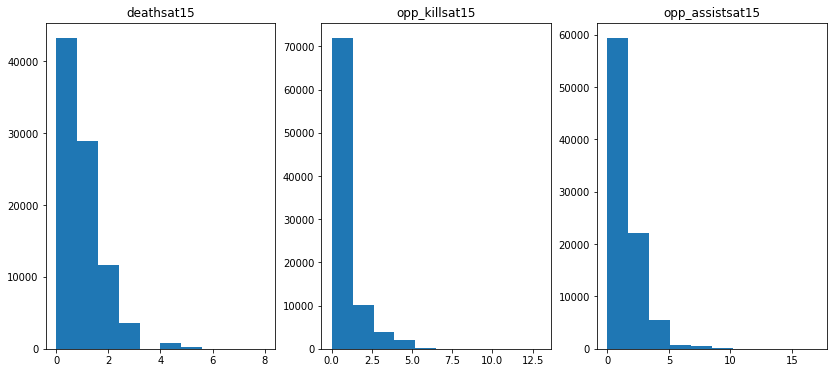

In [42]:

for i in range(0, len(continuous_features)-2, 3):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    fig.set_figheight(6)
    fig.set_figwidth(14)
    ax1.hist(player_data_copy[continuous_features[i]])
    ax1.set_title(continuous_features[i])

    ax2.hist(player_data_copy[continuous_features[i+1]])
    ax2.set_title(continuous_features[i+1])

    ax3.hist(player_data_copy[continuous_features[i+2]])
    ax3.set_title(continuous_features[i+2])
    # plt.tight_layout()



# Find correlation between match result and all the other features

In [43]:
player_data_copy["result"].corr(player_data_copy["firstblood"])


0.1240692045163724

In [44]:
map_features = {}
for fname in player_data_copy.describe().columns:
    correlation = player_data_copy["result"].corr(player_data_copy[fname])
    map_features[fname] = correlation


In [45]:
from collections import OrderedDict
map_f = OrderedDict(sorted(map_features.items(), key=lambda x:x[1], reverse=True))


In [46]:
corr_df = pd.DataFrame(map_f.items(), columns=["Feature Name", "Correlation"])

In [47]:
corr_df.head(10)

,Feature Name,Correlation
0,result,1.000000
1,team kpm,0.690046
2,teamkills,0.686776
3,assists,0.550943
4,earned gpm,0.378506
5,kills,0.374218
6,inhibitors,0.348358
7,golddiffat15,0.326465
8,earnedgold,0.321039
9,totalgold,0.289337


In [48]:
corr_df.tail()

,Feature Name,Correlation
74,opp_assistsat15,-0.179193
75,opp_barons,-0.231171
76,opp_inhibitors,-0.348079
77,deaths,-0.512017
78,teamdeaths,-0.684924


## Separating the features and label

In [49]:
X = player_data_copy.drop("result", axis=1)
y = player_data_copy["result"]

## Splitting the data into train and test set

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
# Get the shape of X_train, X_test, y_train
X_train.shape, X_test.shape, y_train.value_counts()

((70720, 94),
 (17680, 94),
 1    35380
 0    35340
 Name: result, dtype: int64)

# Find the Categorical columns

In [52]:
# First get the data type of the columns
X_train.select_dtypes(include=["object"]).columns

Index(['gameid', 'league', 'split', 'side', 'position', 'playername',
       'playerid', 'teamname', 'teamid', 'champion', 'ban1', 'ban2', 'ban3',
       'ban4', 'ban5'],
      dtype='object')

## Analyze the data inside categorical columns
- The main aim is to see the values inside each column
- Figure out if any categorical column is important
- If it is then we need to do one hot encoding

In [53]:
# Split column
X_train.split.value_counts()

Summer     18804
Spring     16769
Split 1     3480
Split 2     2662
Winter      1619
Closing      728
Opening      724
Champ 1      674
Pro-Am       542
2022         165
Name: split, dtype: int64

In [54]:
# Side 
X_train.side.value_counts()

Red     35399
Blue    35321
Name: side, dtype: int64

In [55]:
X_train.position.value_counts()

top    14189
bot    14170
jng    14139
sup    14122
mid    14100
Name: position, dtype: int64

In [56]:
X_train.champion.value_counts()

Nautilus     2498
Aphelios     2283
Jinx         2268
Viego        2138
Gnar         1829
             ... 
Illaoi          3
Rammus          2
Warwick         1
Fizz            1
Master Yi       1
Name: champion, Length: 161, dtype: int64

In [57]:
X_train["ban1"]

92583       Kalista
108343    Seraphine
78444         Corki
71335           Zoe
103843        Corki
            ...    
9737          Yuumi
83034          Gwen
117324      Taliyah
2208          Akali
23225       Kha'Zix
Name: ban1, Length: 70720, dtype: object

In [58]:
X_train = X_train.reset_index(drop=True)

In [59]:
X_train.head()

,gameid,league,year,split,playoffs,date,game,patch,participantid,side,position,playername,playerid,teamname,teamid,champion,ban1,ban2,ban3,ban4,ban5,gamelength,kills,deaths,assists,teamkills,teamdeaths,doublekills,triplekills,quadrakills,pentakills,firstblood,firstbloodkill,firstbloodassist,firstbloodvictim,team kpm,ckpm,barons,opp_barons,inhibitors,opp_inhibitors,damagetochampions,dpm,damageshare,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,earnedgoldshare,goldspent,total cs,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,xpat10,csat10,opp_goldat10,opp_xpat10,opp_csat10,golddiffat10,xpdiffat10,csdiffat10,killsat10,assistsat10,deathsat10,opp_killsat10,opp_assistsat10,opp_deathsat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,ESPORTSTMNT03_2820464,LJL,2022,Summer,0,2022-07-03 08:41:33,1,12.11,4,Blue,bot,dresscode,oe:player:19578d5faaa29a63cd6c7f2bd1d6c1b,V3 Esports,oe:team:af4b23d4634c4e6ecb5659fb1e689e9,Zeri,Kalista,Azir,Sylas,Yone,Renekton,1870,1,1,0,2,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0642,0.3209,0.0,0.0,0.0,1.0,6311.0,202.4920,0.148491,342.2888,266.6952,12.0,0.3850,16.0,0.5134,6.0,34.0,1.0909,11572,7482.0,240.0642,0.279843,11450.0,300.0,292.0,8.0,NaN,NaN,9.6257,3405.0,2983.0,92.0,3342.0,3172.0,86.0,63.0,-189.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5340.0,5082.0,151.0,5551.0,5230.0,149.0,-211.0,-148.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ESPORTSTMNT06_2530550,TCL,2022,Summer,0,2022-07-24 11:07:00,1,12.13,8,Red,mid,Serin,oe:player:e3b8d5a9290fe0c7458dc01db4dc9dc,İstanbul Wildcats,oe:team:a65adb2808377018a2a7832eb2bd7f4,Akali,Seraphine,Renata Glasc,Taliyah,Irelia,Fiora,1295,12,1,1,35,8,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.6216,1.9923,NaN,NaN,NaN,NaN,18246.0,845.3745,0.225895,560.1081,307.6911,4.0,0.1853,1.0,0.0463,2.0,16.0,0.7413,11178,8261.0,382.7490,0.243604,10800.0,170.0,170.0,4.0,NaN,NaN,8.0618,3666.0,5005.0,82.0,2941.0,4127.0,75.0,725.0,878.0,7.0,2.0,0.0,0.0,0.0,0.0,2.0,6499.0,8372.0,124.0,4577.0,6319.0,108.0,1922.0,2053.0,16.0,4.0,1.0,1.0,1.0,0.0,3.0
2,ESPORTSTMNT05_2760593,UL,2022,NaN,0,2022-06-15 16:50:06,1,12.10,1,Blue,top,Tracyn,oe:player:1725cf69407d2dcdf2873d0669409e8,Illuminar Gaming,oe:team:6cedba5819b5b7c465cb3bb48bfe855,Aatrox,Corki,Kassadin,Kayle,Jax,Karma,1442,0,2,4,14,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.5825,0.6657,0.0,0.0,0.0,0.0,8118.0,337.7809,0.129317,550.4854,475.8391,9.0,0.3745,2.0,0.0832,3.0,20.0,0.8322,8942,5725.0,238.2108,0.173578,7525.0,211.0,199.0,12.0,NaN,NaN,8.7795,3132.0,4525.0,78.0,2901.0,4442.0,56.0,231.0,83.0,22.0,0.0,0.0,1.0,0.0,1.0,0.0,4736.0,7419.0,128.0,4507.0,7494.0,105.0,229.0,-75.0,23.0,0.0,0.0,1.0,0.0,1.0,0.0
3,ESPORTSTMNT01_2915679,LHE,2022,NaN,0,2022-06-01 01:30:43,1,12.09,8,Red,mid,Rodnaldinho,oe:player:6f2047672470d4da705751b4b67f56c,Cruzados Esports,oe:team:cb951a65f688a6e2bdf1d8d4a91da4d,Lissandra,Zoe,Taliyah,Karthus,Sylas,Braum,2245,4,3,10,19,7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5078,0.6949,0.0,0.0,0.0,0.0,12660.0,338.3519,0.204626,461.3452,193.2561,10.0,0.2673,8.0,0.2138,6.0,37.0,0.9889,14419,9564.0,255.6080,0.208999,13850.0,263.0,231.0,32.0,NaN,NaN,7.0290,3023.0,4432.0,77.0,3574.0,4777.0,95.0,-551.0,-345.0,-18.0,0.0,0.0,0.0,0.0,0.0,0.0,4718.0,7115.0,126.0,5632.0,7973.0,160.0,-914.0,-858.0,-34.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ESPORTSTMNT05_2943200,EBL,2022,NaN,0,2022-07-18 17:32:06,1,12.12,8,Red,mid,Diva,oe:player:72de20c106a52f0aaf21bd650af81bd,Valiance,oe:team:7550baf6848b4c199dda63607978183,Ahri,Corki,Volibear,Seraphine,Gnar,Ezreal,1498,5,3,18,35,9,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.4019,1.7623,0.0,0.0,0.0,0.0,22034.0,882.5367,0.250108,601.3618,272.0027,13.0,0.5207,3.0,0.1202,5.0,27.0,1.0814,9976,6644.0,266.1148,0.162698,8875.0,146.0,138.0,8.0,NaN,NaN,5.8478,3204.0,4357.0,69.0,3190.0,4442.0,76.0,14.0,-85.0,-7.0,1.0,2.0,1.0,0.0,1.0,1.0

In [60]:
# Removing the categorical columns
cat_columns = ['gameid', 'league', 'split', 
'side', 'position', 'playername','playerid', 'teamname', 
'teamid', 'champion', 'ban1', 'ban2', 'ban3',
'ban4', 'ban5']
X_train = X_train.drop(cat_columns, axis=1)

X_test = X_test.drop(cat_columns, axis=1)

In [61]:
X_train.head()

,year,playoffs,date,game,patch,participantid,gamelength,kills,deaths,assists,teamkills,teamdeaths,doublekills,triplekills,quadrakills,pentakills,firstblood,firstbloodkill,firstbloodassist,firstbloodvictim,team kpm,ckpm,barons,opp_barons,inhibitors,opp_inhibitors,damagetochampions,dpm,damageshare,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,earnedgoldshare,goldspent,total cs,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,xpat10,csat10,opp_goldat10,opp_xpat10,opp_csat10,golddiffat10,xpdiffat10,csdiffat10,killsat10,assistsat10,deathsat10,opp_killsat10,opp_assistsat10,opp_deathsat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,2022,0,2022-07-03 08:41:33,1,12.11,4,1870,1,1,0,2,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0642,0.3209,0.0,0.0,0.0,1.0,6311.0,202.4920,0.148491,342.2888,266.6952,12.0,0.3850,16.0,0.5134,6.0,34.0,1.0909,11572,7482.0,240.0642,0.279843,11450.0,300.0,292.0,8.0,NaN,NaN,9.6257,3405.0,2983.0,92.0,3342.0,3172.0,86.0,63.0,-189.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5340.0,5082.0,151.0,5551.0,5230.0,149.0,-211.0,-148.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2022,0,2022-07-24 11:07:00,1,12.13,8,1295,12,1,1,35,8,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.6216,1.9923,NaN,NaN,NaN,NaN,18246.0,845.3745,0.225895,560.1081,307.6911,4.0,0.1853,1.0,0.0463,2.0,16.0,0.7413,11178,8261.0,382.7490,0.243604,10800.0,170.0,170.0,4.0,NaN,NaN,8.0618,3666.0,5005.0,82.0,2941.0,4127.0,75.0,725.0,878.0,7.0,2.0,0.0,0.0,0.0,0.0,2.0,6499.0,8372.0,124.0,4577.0,6319.0,108.0,1922.0,2053.0,16.0,4.0,1.0,1.0,1.0,0.0,3.0
2,2022,0,2022-06-15 16:50:06,1,12.10,1,1442,0,2,4,14,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.5825,0.6657,0.0,0.0,0.0,0.0,8118.0,337.7809,0.129317,550.4854,475.8391,9.0,0.3745,2.0,0.0832,3.0,20.0,0.8322,8942,5725.0,238.2108,0.173578,7525.0,211.0,199.0,12.0,NaN,NaN,8.7795,3132.0,4525.0,78.0,2901.0,4442.0,56.0,231.0,83.0,22.0,0.0,0.0,1.0,0.0,1.0,0.0,4736.0,7419.0,128.0,4507.0,7494.0,105.0,229.0,-75.0,23.0,0.0,0.0,1.0,0.0,1.0,0.0
3,2022,0,2022-06-01 01:30:43,1,12.09,8,2245,4,3,10,19,7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5078,0.6949,0.0,0.0,0.0,0.0,12660.0,338.3519,0.204626,461.3452,193.2561,10.0,0.2673,8.0,0.2138,6.0,37.0,0.9889,14419,9564.0,255.6080,0.208999,13850.0,263.0,231.0,32.0,NaN,NaN,7.0290,3023.0,4432.0,77.0,3574.0,4777.0,95.0,-551.0,-345.0,-18.0,0.0,0.0,0.0,0.0,0.0,0.0,4718.0,7115.0,126.0,5632.0,7973.0,160.0,-914.0,-858.0,-34.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2022,0,2022-07-18 17:32:06,1,12.12,8,1498,5,3,18,35,9,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.4019,1.7623,0.0,0.0,0.0,0.0,22034.0,882.5367,0.250108,601.3618,272.0027,13.0,0.5207,3.0,0.1202,5.0,27.0,1.0814,9976,6644.0,266.1148,0.162698,8875.0,146.0,138.0,8.0,NaN,NaN,5.8478,3204.0,4357.0,69.0,3190.0,4442.0,76.0,14.0,-85.0,-7.0,1.0,2.0,1.0,0.0,1.0,1.0,5080.0,6326.0,90.0,5482.0,6695.0,116.0,-402.0,-369.0,-26.0,1.0,9.0,3.0,1.0,2.0,3.0


In [62]:
for c in X_train.columns:
    if "id" in c:
        print(c)

participantid


In [63]:
# Get rid of year and date and participantid
X_train = X_train.drop(["year", "date", "participantid"], axis=1)
X_test = X_test.drop(["year", "date", "participantid"], axis=1)


In [64]:
X_train

,playoffs,game,patch,gamelength,kills,deaths,assists,teamkills,teamdeaths,doublekills,triplekills,quadrakills,pentakills,firstblood,firstbloodkill,firstbloodassist,firstbloodvictim,team kpm,ckpm,barons,opp_barons,inhibitors,opp_inhibitors,damagetochampions,dpm,damageshare,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,earnedgoldshare,goldspent,total cs,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,xpat10,csat10,opp_goldat10,opp_xpat10,opp_csat10,golddiffat10,xpdiffat10,csdiffat10,killsat10,assistsat10,deathsat10,opp_killsat10,opp_assistsat10,opp_deathsat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,0,1,12.11,1870,1,1,0,2,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0642,0.3209,0.0,0.0,0.0,1.0,6311.0,202.4920,0.148491,342.2888,266.6952,12.0,0.3850,16.0,0.5134,6.0,34.0,1.0909,11572,7482.0,240.0642,0.279843,11450.0,300.0,292.0,8.0,NaN,NaN,9.6257,3405.0,2983.0,92.0,3342.0,3172.0,86.0,63.0,-189.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5340.0,5082.0,151.0,5551.0,5230.0,149.0,-211.0,-148.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1,12.13,1295,12,1,1,35,8,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.6216,1.9923,NaN,NaN,NaN,NaN,18246.0,845.3745,0.225895,560.1081,307.6911,4.0,0.1853,1.0,0.0463,2.0,16.0,0.7413,11178,8261.0,382.7490,0.243604,10800.0,170.0,170.0,4.0,NaN,NaN,8.0618,3666.0,5005.0,82.0,2941.0,4127.0,75.0,725.0,878.0,7.0,2.0,0.0,0.0,0.0,0.0,2.0,6499.0,8372.0,124.0,4577.0,6319.0,108.0,1922.0,2053.0,16.0,4.0,1.0,1.0,1.0,0.0,3.0
2,0,1,12.10,1442,0,2,4,14,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.5825,0.6657,0.0,0.0,0.0,0.0,8118.0,337.7809,0.129317,550.4854,475.8391,9.0,0.3745,2.0,0.0832,3.0,20.0,0.8322,8942,5725.0,238.2108,0.173578,7525.0,211.0,199.0,12.0,NaN,NaN,8.7795,3132.0,4525.0,78.0,2901.0,4442.0,56.0,231.0,83.0,22.0,0.0,0.0,1.0,0.0,1.0,0.0,4736.0,7419.0,128.0,4507.0,7494.0,105.0,229.0,-75.0,23.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0,1,12.09,2245,4,3,10,19,7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5078,0.6949,0.0,0.0,0.0,0.0,12660.0,338.3519,0.204626,461.3452,193.2561,10.0,0.2673,8.0,0.2138,6.0,37.0,0.9889,14419,9564.0,255.6080,0.208999,13850.0,263.0,231.0,32.0,NaN,NaN,7.0290,3023.0,4432.0,77.0,3574.0,4777.0,95.0,-551.0,-345.0,-18.0,0.0,0.0,0.0,0.0,0.0,0.0,4718.0,7115.0,126.0,5632.0,7973.0,160.0,-914.0,-858.0,-34.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1,12.12,1498,5,3,18,35,9,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.4019,1.7623,0.0,0.0,0.0,0.0,22034.0,882.5367,0.250108,601.3618,272.0027,13.0,0.5207,3.0,0.1202,5.0,27.0,1.0814,9976,6644.0,266.1148,0.162698,8875.0,146.0,138.0,8.0,NaN,NaN,5.8478,3204.0,4357.0,69.0,3190.0,4442.0,76.0,14.0,-85.0,-7.0,1.0,2.0,1.0,0.0,1.0,1.0,5080.0,6326.0,90.0,5482.0,6695.0,116.0,-402.0,-369.0,-26.0,1.0,9.0,3.0,1.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70715,0,2,12.02,2309,0,3,8,13,19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3378,0.8315,0.0,0.0,0.0,0.0,14080.0,365.8727,0.208939,863.8285,1187.5790,11.0,0.2858,5.0,0.1299,3.0,29.0,0.7536,13112,8127.0,211.1823,0.198239,12375.0,306.0,302.0,4.0,NaN,NaN,7.9515,3459.0,5059.0,90.0,2838.0,4253.0,62.0,621.0,806.0,28.0,0.0,1.0,0.0,0.0,0.0,1.0,5562.0,8345.0,147.0,4889.0,7192.0,109.0,673.0,1153.0,38.0,0.0,2.0,1.0,1.0,0.0,2.0
70716,0,1,12.11,1811,2,1,5,8,13,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.2650,0.6957,0.0,1.0,0.0,0.0,4172.0,138.2220,0.091185,693.7604,942.2087,10.0,0.3313,11.0,0.3644,11.0,39.0,1.2921,9063,5093.0,168.7355,0.178639,8725.0,155.0,24.0,131.0,NaN,NaN,5.1353,3064.0,3207.0,60.0,2986.0,3181.0,63.0,78.0,26.0,-3.0,0.0,1.0,0.0,0.0,0.0,1.0,4588.0,5527.0,95.0,5342.0,5775.0,108.0,-754.0,-248.0,-13.0,0.0,3.0

## Taking care of missing data

In [67]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X_train)
X_train = imputer.transform(X_train)

## Feature scaling on the remaining data

In [68]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_transform = sc.transform(X_train)
X_test_transform = sc.transform(X_test)

## Logistic Regression Model

In [71]:
from sklearn.linear_model import LogisticRegression
model_1 = LogisticRegression(random_state=42)
model_1.fit(X_train_transform, y_train)
y_train_preds = model_1.predict(X_train_transform)
accuracy_score(y_train, y_train_preds), f1_score(y_train, y_train_preds)

(0.9768382352941176, 0.9768676740573365)

In [72]:
from xgboost import XGBClassifier

# Create a model
model_2 = XGBClassifier()

# Fit the model
model_2.fit(X_train_transform, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [73]:
from sklearn.metrics import accuracy_score, f1_score
y_train_preds = model_1.predict(X_train_transform)

In [74]:
accuracy_score(y_train, y_train_preds), f1_score(y_train, y_train_preds)

(0.9768382352941176, 0.9768676740573365)

In [76]:
# Selected features
model_2.feature_importances_

array([0.00350126, 0.0038394 , 0.00440801, 0.00950378, 0.0032771 ,
       0.00367975, 0.00519841, 0.24678038, 0.20910999, 0.00318671,
       0.00296531, 0.        , 0.        , 0.0027958 , 0.00550986,
       0.00189572, 0.00289351, 0.1914732 , 0.00788956, 0.00877554,
       0.00982188, 0.03346639, 0.02796075, 0.0032302 , 0.0028448 ,
       0.00409025, 0.0035007 , 0.0026783 , 0.00301179, 0.00261504,
       0.00220534, 0.00323441, 0.00209326, 0.00332531, 0.00264385,
       0.00862087, 0.00762642, 0.01067655, 0.01299725, 0.00895692,
       0.00268463, 0.00337743, 0.00287387, 0.        , 0.        ,
       0.00288338, 0.00253514, 0.002893  , 0.00219204, 0.00282035,
       0.00251655, 0.00281351, 0.00328772, 0.003062  , 0.00241296,
       0.00288583, 0.00263349, 0.00175546, 0.00106158, 0.00153201,
       0.00252985, 0.00368991, 0.00275074, 0.00299031, 0.00334997,
       0.00259815, 0.00243627, 0.00271976, 0.00272991, 0.00465844,
       0.01061652, 0.00857953, 0.00728251, 0.00623889, 0.01055

In [77]:
# Predict 
y_preds = model_2.predict(X_test_transform)

In [78]:
# Evaluate using the accuracy score 
accuracy_score(y_test, y_preds), f1_score(y_test, y_preds)

(0.9787330316742081, 0.9786872236707856)

In [72]:
# from xgboost import plot_importance
# plot_importance(model)
# plt.show()

In [85]:
# Get feature names
for col, score in zip(X_train.columns, model_2.feature_importances_):
    print(col, score)

[ 0.00000000e+00  1.00000000e+00  1.21100000e+01  1.87000000e+03
  1.00000000e+00  1.00000000e+00  0.00000000e+00  2.00000000e+00
  8.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  6.42000000e-02  3.20900000e-01  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.00000000e+00  6.31100000e+03
  2.02492000e+02  1.48491000e-01  3.42288800e+02  2.66695200e+02
  1.20000000e+01  3.85000000e-01  1.60000000e+01  5.13400000e-01
  6.00000000e+00  3.40000000e+01  1.09090000e+00  1.15720000e+04
  7.48200000e+03  2.40064200e+02  2.79843000e-01  1.14500000e+04
  3.00000000e+02  2.92000000e+02  8.00000000e+00  2.87285319e+01
  3.63434903e+00  9.62570000e+00  3.40500000e+03  2.98300000e+03
  9.20000000e+01  3.34200000e+03  3.17200000e+03  8.60000000e+01
  6.30000000e+01 -1.89000000e+02  6.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  5.34000

> From model.feature_importances_ we can find the worst features and remove them so that we can remove it from the data and again train the model without these features
- Or we can get the top 40 features from the data

In [81]:
sorted_scores = np.sort(model_2.feature_importances_)[::-1]

In [82]:
sorted_scores

array([0.24678038, 0.20910999, 0.1914732 , 0.03346639, 0.02796075,
       0.01299725, 0.01067655, 0.01061652, 0.01055882, 0.00982188,
       0.00950378, 0.00895692, 0.00877554, 0.00862087, 0.00857953,
       0.00788956, 0.00776594, 0.00762642, 0.00728251, 0.00623889,
       0.00550986, 0.00519841, 0.00465844, 0.00440801, 0.00409025,
       0.0038394 , 0.00368991, 0.00367975, 0.00350126, 0.0035007 ,
       0.00337743, 0.00334997, 0.00332531, 0.00328772, 0.0032771 ,
       0.00323441, 0.0032302 , 0.00318671, 0.003062  , 0.00301179,
       0.00299031, 0.00296531, 0.00289351, 0.002893  , 0.00288583,
       0.00288338, 0.00287387, 0.0028448 , 0.00282035, 0.00281351,
       0.0027958 , 0.00275074, 0.00272991, 0.00271976, 0.00268463,
       0.0026783 , 0.00264385, 0.00263349, 0.00261504, 0.00259815,
       0.00253514, 0.00252985, 0.00251655, 0.00243627, 0.00241296,
       0.00220534, 0.00219204, 0.00209326, 0.00189572, 0.00175546,
       0.00153201, 0.00106158, 0.        , 0.        , 0.     

In [83]:
indices = []
for s in sorted_scores:
    idx = np.where(model_2.feature_importances_ == s)
    indices.append(idx[0][0])
print(indices[:40])


[7, 8, 17, 21, 22, 38, 37, 70, 74, 20, 3, 39, 19, 35, 71, 18, 75, 36, 72, 73, 14, 6, 69, 2, 25, 1, 61, 5, 0, 26, 41, 64, 33, 52, 4, 31, 23, 9, 53, 28]


## Get top 40 features

In [86]:
top_40_features = []
for idx in indices[:40]:
    top_40_features.append(X_train.columns[idx])

In [87]:
print(top_40_features)

[array([ 0.00000000e+00,  1.00000000e+00,  1.21500000e+01,  1.51300000e+03,
        2.00000000e+00,  2.00000000e+00,  0.00000000e+00,  3.00000000e+00,
        2.40000000e+01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.19000000e-01,  1.07070000e+00,  0.00000000e+00,
        1.00000000e+00,  0.00000000e+00,  1.00000000e+00,  7.13200000e+03,
        2.82828800e+02,  2.70203000e-01,  4.57673500e+02,  2.70892300e+02,
        1.00000000e+01,  3.96600000e-01,  4.00000000e+00,  1.58600000e-01,
        2.00000000e+00,  1.60000000e+01,  6.34500000e-01,  9.82200000e+03,
        6.46000000e+03,  2.56179800e+02,  3.04936000e-01,  9.50000000e+03,
        2.33000000e+02,  2.25000000e+02,  8.00000000e+00,  2.87285319e+01,
        3.63434903e+00,  9.23990000e+00,  3.09400000e+03,  3.07400000e+03,
        7.50000000e+01,  3.17000000e+03,  3.38000000e+03,  7.50000000e+01,
       -7.60000000e+01, 

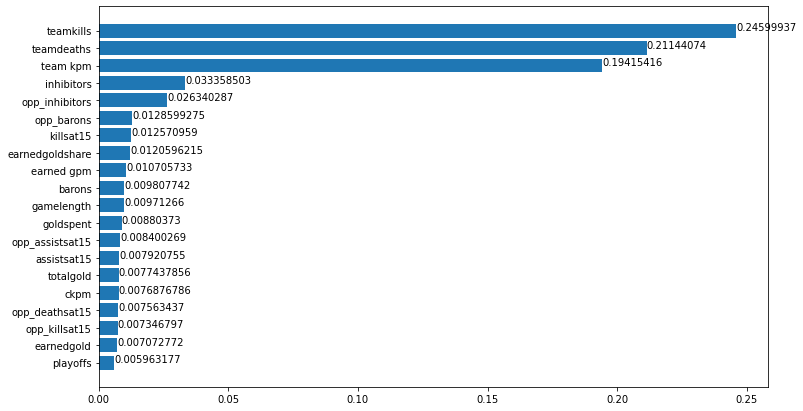

In [79]:
plt.figure(figsize=(12, 7))
plt.barh(top_40_features[:20][::-1], sorted_scores[:20][::-1]);
for i, value in enumerate(sorted_scores[:20][::-1]):
    plt.text(value, i, str(value))

plt.show()


## Experiment model with some categorical variables

In [80]:
# Split the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
# Removing the categorical columns
cat_columns = ['gameid', 'league', 'split', 
'side', 'position', 'playername','playerid', 'teamname', 
'teamid', 'champion', 'ban1', 'ban2', 'ban3',
'ban4', 'ban5']

remove_columns = [
    "gameid", "playername", "playerid", 
    "teamname", "teamid", "ban1", "ban2", 
    "ban3", "ban4", "ban5", "year", "date", "participantid"
]

remaining_columns = ["split", "side", "position", "champion"]

X_train = X_train.drop(remove_columns, axis=1)

X_test = X_test.drop(remove_columns, axis=1)

In [82]:
print("Split Values: ")
print(X_train.split.value_counts())

print("==============")
print("Side Values: ")
print(X_train.side.value_counts())

print("==============")
print("position values")
print(X_train.position.value_counts())

print("===============")
print("champion values")
print(X_train.champion.value_counts())

Split Values: 
Summer     18804
Spring     16769
Split 1     3480
Split 2     2662
Winter      1619
Closing      728
Opening      724
Champ 1      674
Pro-Am       542
2022         165
Name: split, dtype: int64
Side Values: 
Red     35399
Blue    35321
Name: side, dtype: int64
position values
top    14189
bot    14170
jng    14139
sup    14122
mid    14100
Name: position, dtype: int64
champion values
Nautilus     2498
Aphelios     2283
Jinx         2268
Viego        2138
Gnar         1829
             ... 
Illaoi          3
Rammus          2
Warwick         1
Fizz            1
Master Yi       1
Name: champion, Length: 161, dtype: int64


- All are manageable but if we apply one hot encoding to **`champion`** category then it will convert into 160 additional columns and the dataset will be complex

In [83]:
print(X_train.champion.value_counts()[:30])

Nautilus        2498
Aphelios        2283
Jinx            2268
Viego           2138
Gnar            1829
Ahri            1705
Wukong          1646
Gwen            1619
Lee Sin         1607
Xin Zhao        1576
Leona           1520
Zeri            1497
Viktor          1253
Rakan           1210
Ornn            1182
Ezreal          1141
Renata Glasc    1067
Tahm Kench      1036
Volibear        1032
Trundle         1020
Azir            1006
Sylas           1001
Graves           979
Karma            900
Ryze             900
Corki            894
Gangplank        874
Camille          862
Lulu             844
Akali            839
Name: champion, dtype: int64


In [84]:
print(X_train.champion.value_counts()[30:50])

Jarvan IV    786
Thresh       785
Jhin         771
LeBlanc      754
Hecarim      753
Xayah        747
Renekton     741
Gragas       737
Sejuani      700
Jayce        692
Yuumi        689
Lucian       676
Kalista      663
Aatrox       659
Braum        655
Senna        652
Poppy        634
Taliyah      628
Orianna      598
Sivir        587
Name: champion, dtype: int64


> The first thing will be to decide the **`threshold`** based on the number of groups we want

- Let's try to divide it into 10 categories

In [85]:
X_train.champion.value_counts()[:10]

Nautilus    2498
Aphelios    2283
Jinx        2268
Viego       2138
Gnar        1829
Ahri        1705
Wukong      1646
Gwen        1619
Lee Sin     1607
Xin Zhao    1576
Name: champion, dtype: int64

In [86]:
X_test.champion.value_counts()[:10]

Nautilus    664
Jinx        579
Aphelios    570
Viego       531
Ahri        476
Gnar        449
Gwen        431
Lee Sin     413
Xin Zhao    407
Leona       401
Name: champion, dtype: int64

In [87]:
replace_map = {}
count = 0
for k, v in X_train.champion.value_counts().items():
    if count < 10:
        replace_map[k] = k
    else:
        replace_map[k] = "Other"
    count += 1
replace_map


{'Nautilus': 'Nautilus',
 'Aphelios': 'Aphelios',
 'Jinx': 'Jinx',
 'Viego': 'Viego',
 'Gnar': 'Gnar',
 'Ahri': 'Ahri',
 'Wukong': 'Wukong',
 'Gwen': 'Gwen',
 'Lee Sin': 'Lee Sin',
 'Xin Zhao': 'Xin Zhao',
 'Leona': 'Other',
 'Zeri': 'Other',
 'Viktor': 'Other',
 'Rakan': 'Other',
 'Ornn': 'Other',
 'Ezreal': 'Other',
 'Renata Glasc': 'Other',
 'Tahm Kench': 'Other',
 'Volibear': 'Other',
 'Trundle': 'Other',
 'Azir': 'Other',
 'Sylas': 'Other',
 'Graves': 'Other',
 'Karma': 'Other',
 'Ryze': 'Other',
 'Corki': 'Other',
 'Gangplank': 'Other',
 'Camille': 'Other',
 'Lulu': 'Other',
 'Akali': 'Other',
 'Jarvan IV': 'Other',
 'Thresh': 'Other',
 'Jhin': 'Other',
 'LeBlanc': 'Other',
 'Hecarim': 'Other',
 'Xayah': 'Other',
 'Renekton': 'Other',
 'Gragas': 'Other',
 'Sejuani': 'Other',
 'Jayce': 'Other',
 'Yuumi': 'Other',
 'Lucian': 'Other',
 'Kalista': 'Other',
 'Aatrox': 'Other',
 'Braum': 'Other',
 'Senna': 'Other',
 'Poppy': 'Other',
 'Taliyah': 'Other',
 'Orianna': 'Other',
 'Sivir': 

In [88]:
X_train.champion.replace(replace_map)

92583     Other
108343    Other
78444     Other
71335     Other
103843     Ahri
          ...  
9737      Other
83034     Other
117324    Other
2208       Gwen
23225     Other
Name: champion, Length: 70720, dtype: object

- According to the above cell, to make 10 groups we can set the `threshold` to be 1600

Dividing the columns based on value counts 
https://stackoverflow.com/questions/44527731/one-hot-encoding-for-frequent-values-only

In [89]:
# threshold = 1600
# threshold_test = 400
# champion_counts = X_train.champion.value_counts()
# champion_counts_test = X_test.champion.value_counts()

# below_threshold = champion_counts[champion_counts <= threshold].index
# below_threshold_test = champion_counts_test[champion_counts_test <= threshold_test].index

X_train["champion"] = X_train.champion.replace(replace_map)
X_test["champion"] = X_test.champion.replace(replace_map)



In [90]:
X_train.champion.value_counts()

Other       51551
Nautilus     2498
Aphelios     2283
Jinx         2268
Viego        2138
Gnar         1829
Ahri         1705
Wukong       1646
Gwen         1619
Lee Sin      1607
Xin Zhao     1576
Name: champion, dtype: int64

In [91]:
X_test.champion.value_counts()

Other       12792
Nautilus      664
Jinx          579
Aphelios      570
Viego         531
Ahri          476
Gnar          449
Gwen          431
Lee Sin       413
Xin Zhao      407
Wukong        368
Name: champion, dtype: int64

## Feature scaling 
- Categorical columns: Apply one hot encoding
- Numerical columns: Apply standard scaler

In [92]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer

numerical_columns = X_train.describe().columns
categorical_columns = ["split", "side", "position", "champion"]

# Making a column transformer
ct_1 = make_column_transformer(
    (StandardScaler(), numerical_columns),
    (OneHotEncoder(), categorical_columns)
)

# Fitting on the training data
ct_1.fit(X_train)

# Transforming the data into scaled data
X_train_transformed = ct_1.transform(X_train)
X_test_transformed = ct_1.transform(X_test)

In [93]:
scaled_columns = []
for ct_col in ct_1.get_feature_names_out():
    scaled_columns.append(ct_col.split("__")[1])

In [94]:
model_2 = XGBClassifier(random_state=42)

# training the model
model_2.fit(X_train_transformed, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [95]:
y_train_preds_2 = model_2.predict(X_train_transformed)
accuracy_score(y_train, y_train_preds_2), f1_score(y_train, y_train_preds_2)

(0.9981476244343891, 0.9981493254220527)

In [96]:
y_preds_2 = model_2.predict(X_test_transformed)
accuracy_score(y_test, y_preds_2), f1_score(y_test, y_preds_2)

(0.9791289592760181, 0.9790757017295152)

In [97]:
def plot_40_features(model, scaled_columns):
    sorted_scores = np.sort(model.feature_importances_)[::-1]
    indices = []
    for s in sorted_scores:
        idx = np.where(model.feature_importances_ == s)
        indices.append(idx[0][0])
    
    top_40_features = []
    for idx in indices[:40]:
        top_40_features.append(scaled_columns[idx])

    plt.figure(figsize=(12, 7))
    plt.barh(top_40_features[:20][::-1], sorted_scores[:20][::-1]);
    for i, value in enumerate(sorted_scores[:20][::-1]):
        plt.text(value, i, str(value))
    plt.show()
    return indices, sorted_scores, top_40_features


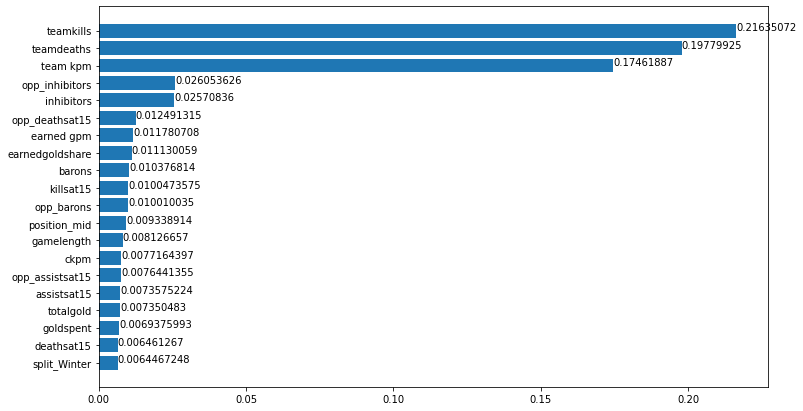

In [98]:
indices, s, top_40 = plot_40_features(model_2, scaled_columns)

In [99]:
for col in match_data.columns:
    if "team" in col:
        print(col)

teamname
teamid
teamkills
teamdeaths
team kpm


> Even after doing categorical encoding, we can see that the three top features are related to team
`teamkills`
`teamdeaths`
`team kpm`
- Since these are all related to teams and not actually the players data, we will remove this and check again.

In [100]:
for col in match_data.columns:
    if "team" in col:
        print(col)

teamname
teamid
teamkills
teamdeaths
team kpm


In [101]:
ct_1.transformers_[1][1].get_feature_names(categorical_columns)

array(['split_2022', 'split_Champ 1', 'split_Closing', 'split_Opening',
       'split_Pro-Am', 'split_Split 1', 'split_Split 2', 'split_Spring',
       'split_Summer', 'split_Winter', 'split_nan', 'side_Blue',
       'side_Red', 'position_bot', 'position_jng', 'position_mid',
       'position_sup', 'position_top', 'champion_Ahri',
       'champion_Aphelios', 'champion_Gnar', 'champion_Gwen',
       'champion_Jinx', 'champion_Lee Sin', 'champion_Nautilus',
       'champion_Other', 'champion_Viego', 'champion_Wukong',
       'champion_Xin Zhao'], dtype=object)

## Experiment model without team features

In [102]:
# Split the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Removing categorical columns

In [103]:
# Removing the categorical columns
cat_columns = ['gameid', 'league', 'split', 
'side', 'position', 'playername','playerid', 'teamname', 
'teamid', 'champion', 'ban1', 'ban2', 'ban3',
'ban4', 'ban5']

remove_columns = [
    "gameid", "playername", "playerid", 
    "teamname", "teamid", "ban1", "ban2", 
    "ban3", "ban4", "ban5", "year", "date", "participantid"
]

remaining_columns = ["split", "side", "position", "champion"]

X_train = X_train.drop(remove_columns, axis=1)

X_test = X_test.drop(remove_columns, axis=1)

### Creating replace map for categorical columns

In [104]:
replace_map = {}
count = 0
for k, v in X_train.champion.value_counts().items():
    if count < 10:
        replace_map[k] = k
    else:
        replace_map[k] = "Other"
    count += 1
replace_map

{'Nautilus': 'Nautilus',
 'Aphelios': 'Aphelios',
 'Jinx': 'Jinx',
 'Viego': 'Viego',
 'Gnar': 'Gnar',
 'Ahri': 'Ahri',
 'Wukong': 'Wukong',
 'Gwen': 'Gwen',
 'Lee Sin': 'Lee Sin',
 'Xin Zhao': 'Xin Zhao',
 'Leona': 'Other',
 'Zeri': 'Other',
 'Viktor': 'Other',
 'Rakan': 'Other',
 'Ornn': 'Other',
 'Ezreal': 'Other',
 'Renata Glasc': 'Other',
 'Tahm Kench': 'Other',
 'Volibear': 'Other',
 'Trundle': 'Other',
 'Azir': 'Other',
 'Sylas': 'Other',
 'Graves': 'Other',
 'Karma': 'Other',
 'Ryze': 'Other',
 'Corki': 'Other',
 'Gangplank': 'Other',
 'Camille': 'Other',
 'Lulu': 'Other',
 'Akali': 'Other',
 'Jarvan IV': 'Other',
 'Thresh': 'Other',
 'Jhin': 'Other',
 'LeBlanc': 'Other',
 'Hecarim': 'Other',
 'Xayah': 'Other',
 'Renekton': 'Other',
 'Gragas': 'Other',
 'Sejuani': 'Other',
 'Jayce': 'Other',
 'Yuumi': 'Other',
 'Lucian': 'Other',
 'Kalista': 'Other',
 'Aatrox': 'Other',
 'Braum': 'Other',
 'Senna': 'Other',
 'Poppy': 'Other',
 'Taliyah': 'Other',
 'Orianna': 'Other',
 'Sivir': 

### Replacing the values in champion

In [105]:
X_train["champion"] = X_train.champion.replace(replace_map)
X_test["champion"] = X_test.champion.replace(replace_map)

## Before feature scaling, we need to remove team parameters

In [106]:
team_columns = ["teamkills", "teamdeaths", "team kpm"]
X_train = X_train.drop(team_columns, axis=1)

X_test = X_test.drop(team_columns, axis=1)

## Feature Scaling

In [107]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer

numerical_columns = X_train.describe().columns
categorical_columns = ["split", "side", "position", "champion"]

# Making a column transformer
ct_2 = make_column_transformer(
    (StandardScaler(), numerical_columns),
    (OneHotEncoder(), categorical_columns)
)

# Fitting on the training data
ct_2.fit(X_train)

# Transforming the data into scaled data
X_train_transformed = ct_2.transform(X_train)
X_test_transformed = ct_2.transform(X_test)

### Finding the columns after feature scaling

In [108]:
scaled_columns = []
for ct_col in ct_2.get_feature_names_out():
    scaled_columns.append(ct_col.split("__")[1])

## Building a model

In [109]:
model_3 = XGBClassifier(random_state=42)

# training the model
model_3.fit(X_train_transformed, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [110]:
y_train_preds_3 = model_3.predict(X_train_transformed)
accuracy_score(y_train, y_train_preds_3), f1_score(y_train, y_train_preds_3)

(0.9950650452488687, 0.9950699947733469)

In [111]:
y_preds_3 = model_3.predict(X_test_transformed)
accuracy_score(y_test, y_preds_3), f1_score(y_test, y_preds_3)

(0.9697963800904977, 0.9698134539287734)

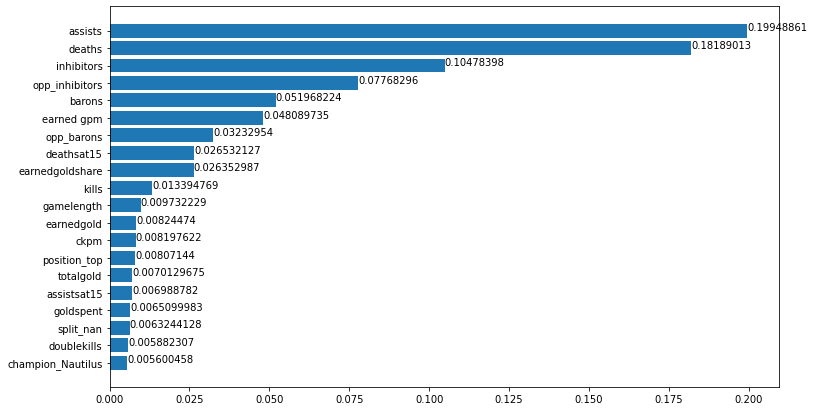

In [112]:
indices, s, top_40 = plot_40_features(model_3, scaled_columns)

In [113]:
top_40

['assists',
 'deaths',
 'inhibitors',
 'opp_inhibitors',
 'barons',
 'earned gpm',
 'opp_barons',
 'deathsat15',
 'earnedgoldshare',
 'kills',
 'gamelength',
 'earnedgold',
 'ckpm',
 'position_top',
 'totalgold',
 'assistsat15',
 'goldspent',
 'split_nan',
 'doublekills',
 'champion_Nautilus',
 'damageshare',
 'split_Summer',
 'playoffs',
 'split_Spring',
 'opp_goldat15',
 'patch',
 'champion_Xin Zhao',
 'side_Blue',
 'triplekills',
 'monsterkillsenemyjungle',
 'opp_killsat15',
 'split_Split 1',
 'goldat15',
 'game',
 'total cs',
 'goldat10',
 'minionkills',
 'dpm',
 'split_Winter',
 'wardskilled']

In [114]:
player_data_copy["playername"].value_counts()

unknown player    749
Gumayusi          126
Faker             126
Oner              126
Zeus              126
                 ... 
SeNBon              1
Cebolla             1
Scott               1
jime                1
Hannah              1
Name: playername, Length: 2827, dtype: int64

In [115]:
playerNamesList = player_data_copy.playername.unique()

## Experiment model without opposite team features

In [116]:
# Split the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Removing the categorical columns
cat_columns = ['gameid', 'league', 'split', 
'side', 'position', 'playername','playerid', 'teamname', 
'teamid', 'champion', 'ban1', 'ban2', 'ban3',
'ban4', 'ban5']

remove_columns = [
    "gameid", "playername", "playerid", 
    "teamname", "teamid", "ban1", "ban2", 
    "ban3", "ban4", "ban5", "year", "date", "participantid"
]

remaining_columns = ["split", "side", "position", "champion"]

X_train = X_train.drop(remove_columns, axis=1)

X_test = X_test.drop(remove_columns, axis=1)

replace_map = {}
count = 0
for k, v in X_train.champion.value_counts().items():
    if count < 10:
        replace_map[k] = k
    else:
        replace_map[k] = "Other"
    count += 1

# Replace champion map
X_train["champion"] = X_train.champion.replace(replace_map)
X_test["champion"] = X_test.champion.replace(replace_map)

# Remove team features
team_columns = ["teamkills", "teamdeaths", "team kpm"]
X_train = X_train.drop(team_columns, axis=1)

X_test = X_test.drop(team_columns, axis=1)

opp_columns = []
for c in X_train.columns:
    if "opp" in c:
        opp_columns.append(c)

X_train = X_train.drop(opp_columns, axis=1)

X_test = X_test.drop(opp_columns, axis=1)


# Feature Scaling
numerical_columns = X_train.describe().columns
categorical_columns = ["split", "side", "position", "champion"]

# Making a column transformer
ct_3 = make_column_transformer(
    (StandardScaler(), numerical_columns),
    (OneHotEncoder(), categorical_columns)
)

# Fitting on the training data
ct_3.fit(X_train)

# Transforming the data into scaled data
X_train_transformed = ct_3.transform(X_train)
X_test_transformed = ct_3.transform(X_test)

# Finding the columns after feature scaling
scaled_columns = []
for ct_col in ct_3.get_feature_names_out():
    scaled_columns.append(ct_col.split("__")[1])

In [117]:
model_4 = XGBClassifier(random_state=42)

# training the model
model_4.fit(X_train_transformed, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [118]:
y_train_preds_4 = model_4.predict(X_train_transformed)
accuracy_score(y_train, y_train_preds_4), f1_score(y_train, y_train_preds_4)

(0.9945135746606335, 0.9945210122006326)

In [119]:
y_preds_4 = model_4.predict(X_test_transformed)
accuracy_score(y_test, y_preds_4), f1_score(y_test, y_preds_4)

(0.9672511312217195, 0.9672603901611535)

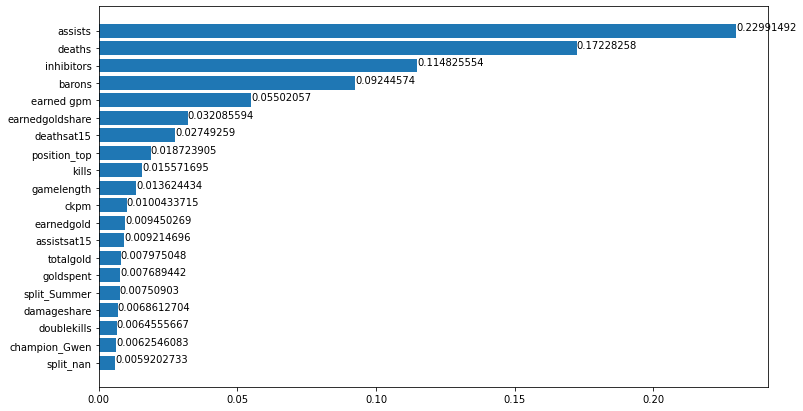

In [120]:
indices, s, top_40 = plot_40_features(model_4, scaled_columns)

In [121]:
pd.DataFrame(X_train_transformed, columns=scaled_columns)

,playoffs,game,patch,gamelength,kills,deaths,assists,doublekills,triplekills,quadrakills,pentakills,firstblood,firstbloodkill,firstbloodassist,firstbloodvictim,ckpm,barons,inhibitors,damagetochampions,dpm,damageshare,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,earnedgoldshare,goldspent,total cs,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,xpat10,csat10,golddiffat10,xpdiffat10,csdiffat10,killsat10,assistsat10,deathsat10,goldat15,xpat15,csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,split_2022,split_Champ 1,split_Closing,split_Opening,split_Pro-Am,split_Split 1,split_Split 2,split_Spring,split_Summer,split_Winter,split_nan,side_Blue,side_Red,position_bot,position_jng,position_mid,position_sup,position_top,champion_Ahri,champion_Aphelios,champion_Gnar,champion_Gwen,champion_Jinx,champion_Lee Sin,champion_Nautilus,champion_Other,champion_Viego,champion_Wukong,champion_Xin Zhao
0,-0.478265,-0.507659,0.676397,-0.153876,-0.682246,-0.936155,-1.445213,-0.495894,-0.230483,-0.098337,-0.042253,-0.567335,-0.332542,-0.410069,-0.333538,-2.048366,-0.345577,-0.398332,-0.833140,-0.903290,-0.534369,-0.971984,-0.762125,-0.466500,-0.475748,1.202648,1.475729,-0.341034,-0.465427,-0.462645,0.024737,0.062173,0.141234,1.172771,0.244945,0.924983,1.117425,-0.574667,NaN,NaN,1.048457,0.492837,-0.738275,0.997453,0.120553,-0.413791,0.381386,-0.561522,-0.657951,-0.625539,0.397689,-0.555088,1.076571,-0.211819,-0.191813,0.084823,-0.714544,-0.852687,-0.825695,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.478265,-0.507659,1.108396,-1.854374,3.425529,-0.936155,-1.217686,2.524356,3.634770,-0.098337,-0.042253,-0.567335,-0.332542,-0.410069,-0.333538,3.925675,NaN,NaN,0.599592,1.905545,0.268085,-0.071238,-0.635254,-0.933012,-0.884292,-1.346754,-1.390574,-1.096449,-1.154824,-0.953579,-0.090826,0.315894,1.782595,0.640613,0.043230,-0.305345,0.058416,-0.645694,NaN,NaN,0.545210,0.962526,1.512625,0.648639,1.372438,1.928184,0.444332,2.198068,-0.657951,-0.625539,1.578907,1.707691,0.491093,1.941604,2.666721,0.656209,3.053864,-0.168548,0.259174,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.478265,-0.507659,0.460398,-1.419638,-1.055680,-0.423316,-0.535104,-0.495894,-0.230483,-0.098337,-0.042253,-0.567335,-0.332542,-0.410069,2.998163,-0.815957,-0.345577,-0.398332,-0.616219,-0.312196,-0.733148,-0.111031,-0.114881,-0.641442,-0.497229,-1.176794,-1.164141,-0.907595,-1.001625,-0.825931,-0.746660,-0.510084,0.119913,-0.387695,-0.973106,0.082681,0.310148,-0.503640,NaN,NaN,0.776159,0.001554,0.978287,0.509114,0.438252,0.183226,1.388518,-0.561522,-0.657951,0.903538,-0.217889,1.052241,0.577830,0.232394,-0.097004,0.941902,-0.714544,-0.852687,0.259174,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.478265,-0.507659,0.244398,0.955144,0.438056,0.089522,0.830060,1.014231,-0.230483,-0.098337,-0.042253,-0.567335,-0.332542,-0.410069,-0.333538,-0.711588,-0.345577,-0.398332,-0.070977,-0.309701,0.047588,-0.479651,-0.989400,-0.583128,-0.716537,-0.157033,-0.362730,-0.341034,-0.350527,-0.605881,0.859781,0.740282,0.320041,0.132450,0.989741,0.574812,0.587921,-0.148506,NaN,NaN,0.212865,-0.194599,0.874759,0.474233,-1.040561,-0.756197,-1.129311,-0.561522,-0.657951,-0.625539,-0.236234,0.843158,0.534462,-0.921550,-1.113920,-1.384454,-0.714544,-0.852687,-0.825695,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.478265,-0.507659,0.892396,-1.254024,0.811490,0.089522,2.650278,-0.495894,-0.230483,-0.098337,-0.042253,1.762627,-0.332542,2.438617,-0.333538,3.103592,-0.345577,-0.398332,1.054320,2.067911,0.519104,0.099358,-0.745700,-0.408186,-0.198134,-1.006834,-0.9